In [1]:
!which python

/workspace/ComfyUI-Svg2Raster/.svg2png/bin/python


In [7]:
import cairosvg
from PIL import Image
import io

In [4]:
# read svg as string
svg_path = 'examples/porsche-logo.svg'
with open(svg_path, "r", encoding="utf-8") as f:
    svg_text = f.read()
print(svg_text[:1000])

<?xml version="1.0" encoding="utf-8"?>
<svg xmlns="http://www.w3.org/2000/svg" version="1.1" viewBox="0.00 0.00 390.00 490.00">
<g stroke-width="2.00" fill="none" stroke-linecap="butt">
<path stroke="#fef0a3" vector-effect="non-scaling-stroke" d="M 149.96 14.35&#xA;  Q 116.62 18.38 84.66 28.55&#xA;  Q 66.89 34.20 52.28 41.15&#xA;  Q 51.82 41.36 51.82 41.87&#xA;  Q 51.83 65.41 52.17 119.25&#xA;  C 52.21 126.85 52.65 136.38 52.72 143.92&#xA;  Q 52.85 159.22 53.29 204.28&#xA;  Q 53.42 217.72 54.06 224.29&#xA;  Q 55.30 236.99 58.56 248.88&#xA;  Q 64.38 270.09 75.43 289.93&#xA;  Q 97.55 329.62 134.00 358.94&#xA;  Q 155.70 376.39 179.26 386.60&#xA;  Q 186.75 389.84 195.41 391.80&#xA;  Q 202.10 393.31 208.20 390.71&#xA;  Q 217.96 386.54 227.54 381.95"/>
<path stroke="#fce9a3" vector-effect="non-scaling-stroke" d="M 227.54 381.95&#xA;  Q 252.65 369.15 274.09 350.84&#xA;  Q 295.03 332.96 311.21 309.97&#xA;  Q 331.49 281.15 339.50 246.92&#xA;  Q 341.10 240.10 342.09 231.56&#xA;  Q 343.28 221.41 

In [5]:
help(cairosvg.svg2png)

Help on function svg2png in module cairosvg:

svg2png(bytestring=None, *, file_obj=None, url=None, dpi=96, parent_width=None, parent_height=None, scale=1, unsafe=False, background_color=None, negate_colors=False, invert_images=False, write_to=None, output_width=None, output_height=None)
    Convert an SVG document to PNG.
    
    Specify the input by passing one of these:
    
    :param bytestring: The SVG source as a byte-string.
    :param file_obj: A file-like object.
    :param url: A filename.
    
    Give some options:
    
    :param dpi: The ratio between 1 inch and 1 pixel.
    :param parent_width: The width of the parent container in pixels.
    :param parent_height: The height of the parent container in pixels.
    :param scale: The ouptut scaling factor.
    :param unsafe: A boolean allowing external file access, XML entities
                   and very large files
                   (WARNING: vulnerable to XXE attacks and various DoS).
    
    Specifiy the output with:

(390, 490)


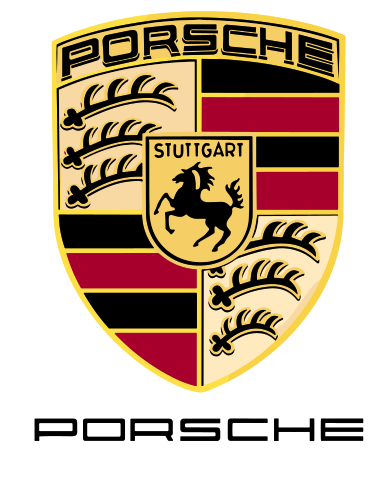

In [9]:
# default conversion (done at 96 dpi)
img_bytes = cairosvg.svg2png(bytestring=svg_text.encode("utf-8"))
img = Image.open(io.BytesIO(img_bytes)).convert("RGBA")
print(img.size)
img

(600, 754)


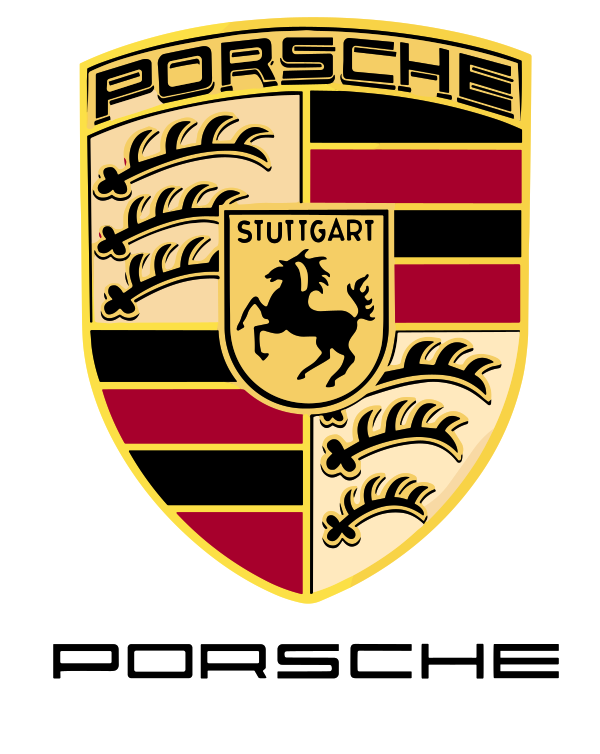

In [13]:
# convert at particular size (width)
img_bytes = cairosvg.svg2png(bytestring=svg_text.encode("utf-8"), output_width=600)
img = Image.open(io.BytesIO(img_bytes)).convert("RGBA")
print(img.size)
img

(600, 600)


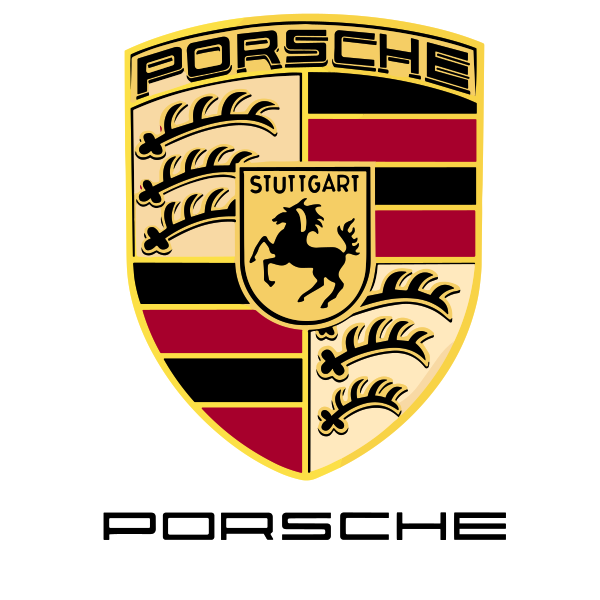

In [14]:
# convert at particular size (width and height) (aspect ratio is maintained, padding done)
img_bytes = cairosvg.svg2png(bytestring=svg_text.encode("utf-8"), output_width=600, output_height=600)
img = Image.open(io.BytesIO(img_bytes)).convert("RGBA")
print(img.size)
img

(780, 980)


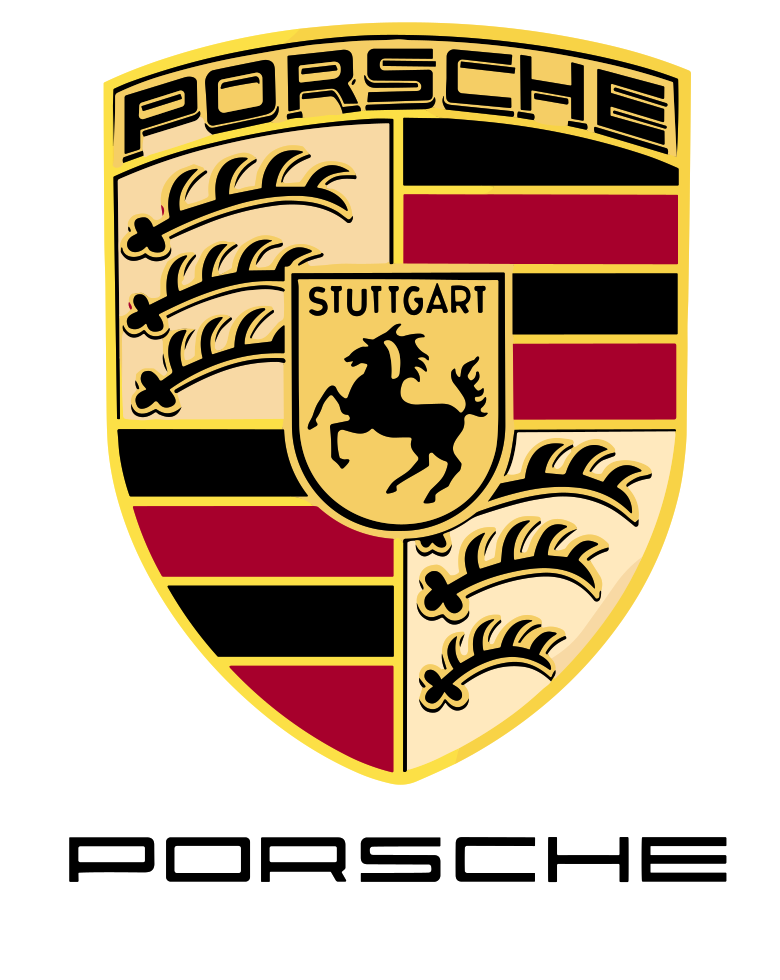

In [16]:
# convert at particular size (use scale parameter)
img_bytes = cairosvg.svg2png(bytestring=svg_text.encode("utf-8"), scale=2)
img = Image.open(io.BytesIO(img_bytes)).convert("RGBA")
print(img.size)
img

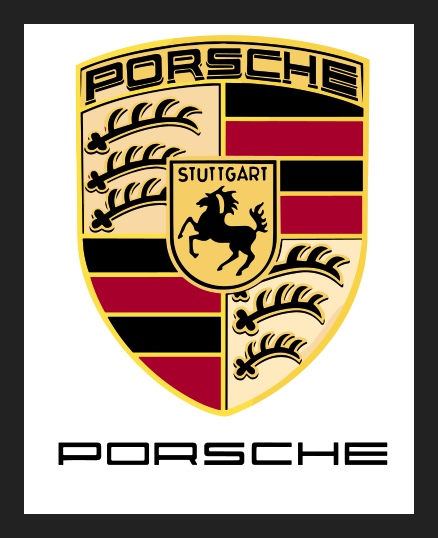

In [18]:
# Add a border 
from PIL import ImageOps

BORDER_PX = 24
BORDER_COLOR = "#222222"  # or any hex color
img_bytes = cairosvg.svg2png(bytestring=svg_text.encode("utf-8"))
img = Image.open(io.BytesIO(img_bytes)).convert("RGBA")
img_with_border = ImageOps.expand(img, border=BORDER_PX, fill=BORDER_COLOR)
img_with_border

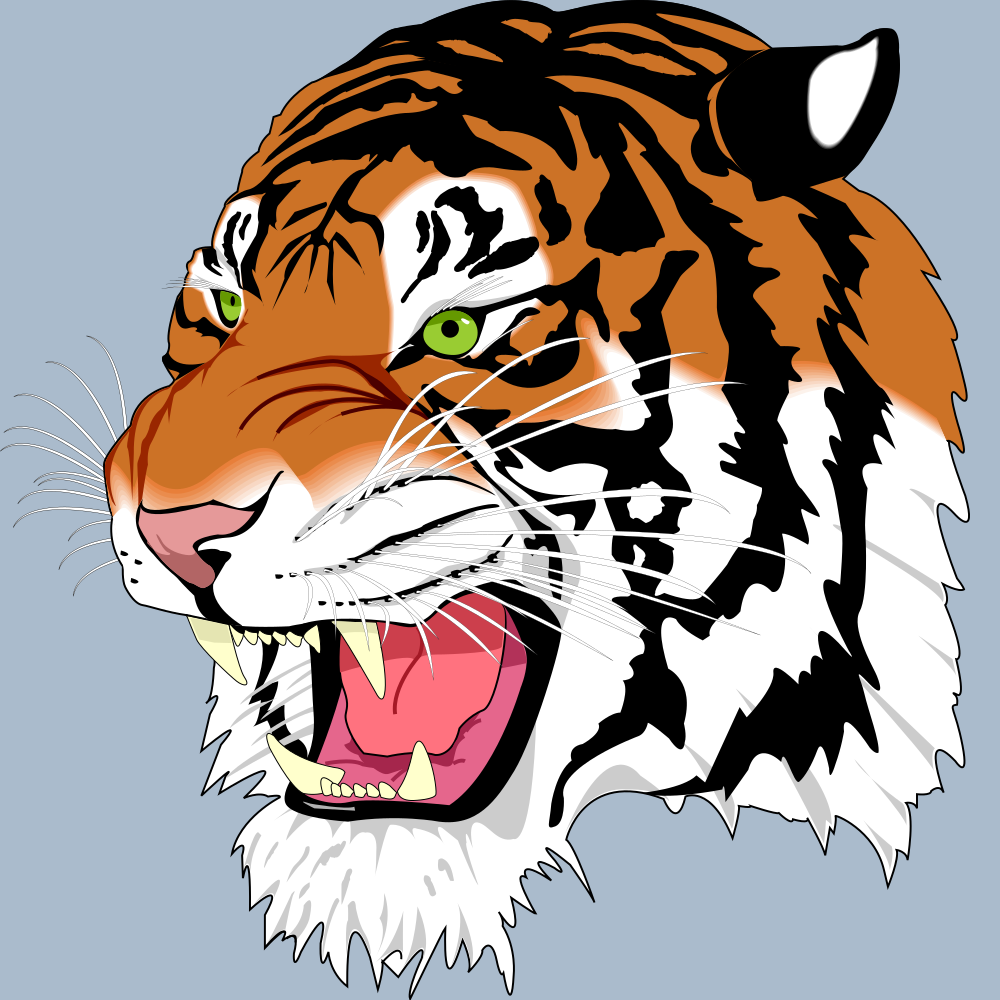

In [26]:
# Change the background color (if Transparent PNG)
svg_path = 'examples/tiger.svg'
BACK_COLOR = "#AABBCC"
with open(svg_path, "r", encoding="utf-8") as f:
    svg_text = f.read()
img_bytes = cairosvg.svg2png(bytestring=svg_text.encode("utf-8"), output_width=1000)
img = Image.open(io.BytesIO(img_bytes)).convert("RGBA")

def _hex_rgb(h):
    h = h.strip()
    return (int(h[1:3],16), int(h[3:5],16), int(h[5:7],16))

def _hex_rgba(h, a):
    r,g,b = _hex_rgb(h)
    return (r,g,b,a)

# add background color
bg = Image.new("RGBA", img.size, _hex_rgba(BACK_COLOR, 255))
bg.alpha_composite(img)
img = bg
img